# Real Estate Project - Monte Carlo Simulation (Part 1)

## Running a simple Monte Carlo Simulation

In [1]:
import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wb = xw.Book("real_estate.xlsx")

In [3]:
inp = wb.sheets[0]
inp

<Sheet [real_estate.xlsx]Input>

In [4]:
inp["D20"].name = "cpi"

In [7]:
inp["D25"].name = "ppf"

In [8]:
inp["D40"].name = "cost"

In [9]:
inp["G24:G25"].name = "performance"

In [10]:
inp["performance"].value

[2.0715448729343438, 0.07980898320674898]

__Probability Distribution CPI (normal)__

In [5]:
cpi_exp = 0.02
cpi_std = 0.01

In [6]:
sims = 10000

In [11]:
cpi_pd = np.random.normal(cpi_exp, cpi_std, sims)
cpi_pd

array([0.0242485 , 0.00366652, 0.02329298, ..., 0.02637313, 0.03943882,
       0.03610626])

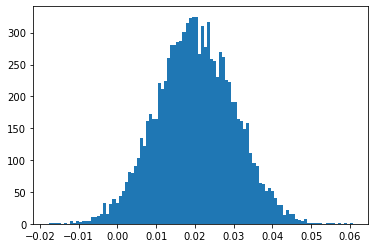

In [12]:
plt.hist(cpi_pd, bins = 100)
plt.show()

__Probability Distribution Purchase Price Factor (normal)__

In [13]:
ppf_exp = 23
ppf_std = 3

In [14]:
ppf_pd = np.random.normal(ppf_exp, ppf_std, sims)
ppf_pd

array([29.41188894, 16.23366802, 23.02627211, ..., 25.55350355,
       28.68782519, 25.14006596])

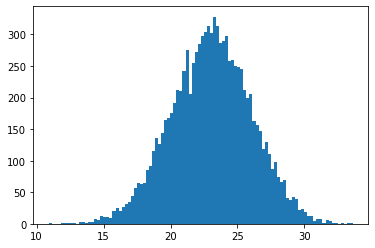

In [15]:
plt.hist(ppf_pd, bins = 100)
plt.show()

__Probability Distribution Costs (normal)__

In [25]:
cost_exp = 250000
cost_std = 50000

__Final Assumption: No Correlation between Inputs (can be changed)__

In [26]:
sims = 10000

In [27]:
results = np.empty((sims, 2))
for i in range(sims):
    inp["cpi"].value = np.random.normal(cpi_exp, cpi_std)
    inp["ppf"].value = np.random.normal(ppf_exp, ppf_std)
    inp["cost"].value = np.random.normal(cost_exp, cost_std)
    results[i] = inp["performance"].value

In [28]:
results

array([[1.46016363, 0.04076281],
       [1.40544095, 0.03699107],
       [1.56531353, 0.04908643],
       ...,
       [1.73001793, 0.06007977],
       [1.79923143, 0.06433541],
       [1.13517559, 0.01364637]])

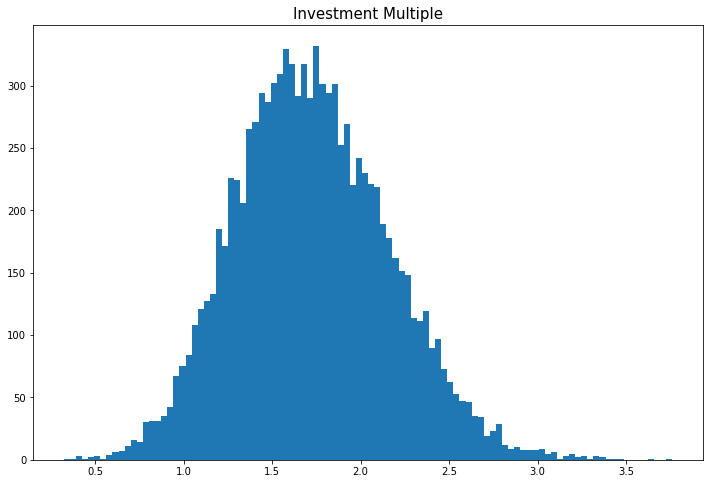

In [29]:
plt.figure(figsize = (12, 8))
plt.hist(results[:, 0], bins = 100)
plt.title("Investment Multiple", fontsize = 15)
plt.show()

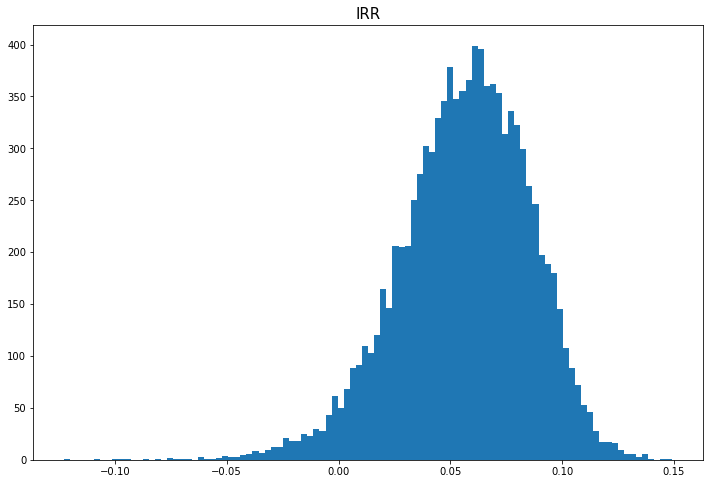

In [30]:
plt.figure(figsize = (12, 8))
plt.hist(results[:, 1], bins = 100)
plt.title("IRR", fontsize = 15)
plt.show()

In [31]:
results.mean(axis = 0)

array([1.72765319, 0.05634113])

In [32]:
np.median(results, axis = 0)

array([1.70498937, 0.05833846])

In [33]:
sum(results[:, 0] < 1) / sims

0.0361

## Running a more realistic/advanced Monte Carlo Simulation

In [34]:
import xlwings as xw
import numpy as np
import matplotlib.pyplot as plt

In [35]:
wb = xw.Book("real_estate.xlsx")

In [36]:
inp = wb.sheets[0]
calc = wb.sheets[1]

In [37]:
cpi_exp = 0.02
cpi_std = 0.01

In [38]:
ppf_exp = 23
ppf_std = 3

In [39]:
cost_exp = 250000
cost_std = 50000

In [40]:
sims = 1000

In [41]:
results = np.empty((sims, 2))
for i in range(sims):
    calc["B3"].options(transpose = True).value = np.random.normal(cpi_exp, cpi_std, 10)
    inp["D25"].value = np.random.normal(ppf_exp, ppf_std)
    calc["H3"].options(transpose = True).value = -np.random.normal(cost_exp, cost_std, 10)
    results[i] = inp["G24:G25"].value

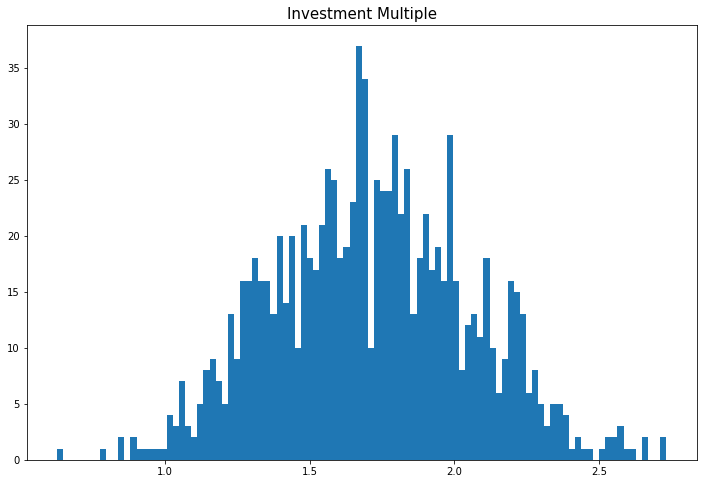

In [42]:
plt.figure(figsize = (12, 8))
plt.hist(results[:, 0], bins = 100)
plt.title("Investment Multiple", fontsize = 15)
plt.show()

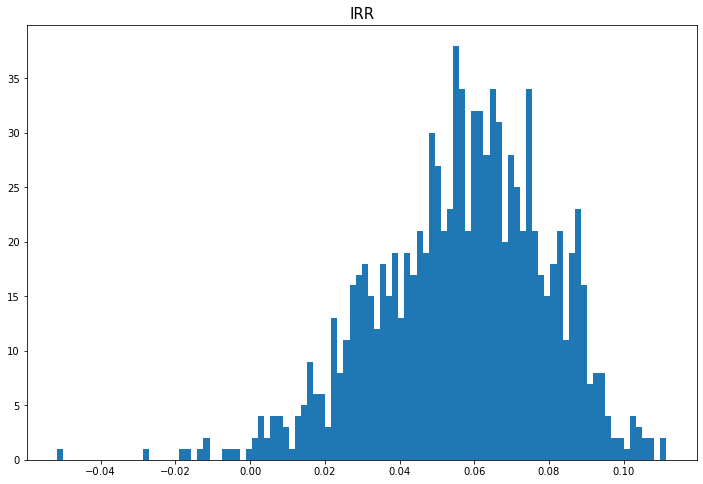

In [45]:
plt.figure(figsize = (12, 8))
plt.hist(results[:, 1], bins = 100)
plt.title("IRR", fontsize = 15)
plt.show()

In [44]:
np.median(results, axis = 0)

array([1.69981351, 0.05800246])

In [46]:
sum(results[:, 0] < 1) / sims

0.011

## Final Considerations

In [47]:
calc["B3:B12"].formula = "=Input!D20"

In [48]:
calc["B3:B12"].formula = "=Input!$D$20"

In [49]:
calc["H3:H12"].formula = "=-Input!$D$40"